<font size="+2"><p style="text-align: center;"><b> Auswertung Versuch 222 PAP 2.1. </p></font>

## 3.1 Betrieb als Kältemaschine

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Durchflussmenge
flow = 233*1e-6/60
flow_error = 3*1e-6/60
print(flow, " +-", flow_error)

(3.883333333333333e-06, ' +-', 5.0000000000000004e-08)


In [3]:
f = 310.0/60
f_error = 5.0/60 

In [4]:
Delta_T = 3.25
Delta_T_error = 0.28

In [5]:
c_W = 4180
rho_W = 998

In [6]:
U_H = 5.51
U_H_error = 0.01
I_H = 1.09 * 5
I_H_error = 0.01 * 5
P_H = U_H*I_H
P_H_error = P_H*np.sqrt((I_H_error/I_H)**2 + (U_H_error/U_H)**2)
W_H = P_H/f
W_H_error = W_H*np.sqrt((P_H_error/P_H)**2 + (f_error/f)**2)

In [7]:
Q_1 = c_W*rho_W*Delta_T*flow/f
Q_1_error = Q_1*np.sqrt((Delta_T_error/Delta_T)**2 + (flow_error/flow)**2 + (f_error/f)**2)
Q_2 = W_H
Q_2_error = W_H_error
print("Die an das Kuehlwasser abgegebene Waerme betraegt: ", Q_1, " +- ", Q_1_error)
print("Die dem Zylinderkopf entzogene Waerme betraegt: ", Q_2, " +- ", Q_2_error)
print("Differenz beider Waermemengen: ", Q_1 - Q_2, " +- ", np.sqrt(Q_1_error**2 + Q_2_error**2))

('Die an das Kuehlwasser abgegebene Waerme betraegt: ', 10.190239967741935, ' +- ', 0.9027661397794005)
('Die dem Zylinderkopf entzogene Waerme betraegt: ', 5.81216129032258, ' +- ', 0.10836329767604393)
('Differenz beider Waermemengen: ', 4.378078677419355, ' +- ', 0.9092465602989251)


In [8]:
# Kälteleistung:
P = Q_1*f
P_error = P*np.sqrt((Delta_T_error/Delta_T)**2 + (flow_error/flow)**2)
print(P, " +- ", P_error)

(52.64957316666666, ' +- ', 4.586338330241733)


In [9]:
# Motorleistung:
U_M = 24.1
U_M_error = 0.1
I_M = 2.1
I_M_error = 0.1
P_M = U_M*I_M
P_M_error = P_M * np.sqrt((U_M_error/U_M)**2 + (I_M_error/I_M)**2)
W_M = P_M/f
W_M_error = W_M*np.sqrt((P_M_error/P_M)**2 + (f_error/f)**2)
print("Motorarbeit: ", W_M, " +- ", W_M_error)

('Motorarbeit: ', 9.795483870967743, ' +- ', 0.49415635763643184)


In [10]:
diff = W_M + Q_2 - Q_1
diff_error = 1/f*np.sqrt((I_M*U_M_error)**2 + (U_M*I_M_error)**2 + (I_H*U_H_error)**2 + (U_H * I_H_error)**2 + (flow*Delta_T_error)**2 + (Delta_T*flow_error)**2 + (diff/f*f_error)**2)
print(diff, " +- ", diff_error)

(5.4174051935483885, ' +- ', 0.47166694872568254)


In [11]:
eta = Q_2/W_M
eta_error = eta*np.sqrt((Q_2_error/Q_2)**2 + (W_M_error/W_M)**2)
print("Wirkungsgrad: ", eta, " +- ", eta_error)

('Wirkungsgrad: ', 0.5933511163801619, ' +- ', 0.031911834063763196)


## 3.2 Betrieb als Kältemaschine und Wärmepumpe

In [12]:
m_W = 1e-3
m_W_error = 1e-4
lambda_W = 335e3
t = 130
t_error = 10

In [13]:
Q_1 = m_W*lambda_W/(f*t)
Q_1_error = Q_1*np.sqrt((m_W_error/m_W)**2 + (t_error/t)**2)
print(Q_1, " +- ", Q_1_error)

(0.49875930521091805, ' +- ', 0.04987593052109181)


In [14]:
P = Q_1*f
P_error = P*np.sqrt((f_error/f)**2 + (t_error/t)**2)
print(P, " +- ", P_error)

(2.5769230769230766, ' +- ', 0.04156327543424317)


## 3.3 Betrieb als Wärmekraftmaschine

In [15]:
# Motordrehzahlen
freqs = np.array([345.0, 345.6, 346.2])/60
f = np.average(freqs);f

5.760000000000001

In [16]:
# Durchflussmengen
flow = 231.0*1e-6/60
flow_error = 3.01e-6/60
print(flow, " +-", flow_error)

(3.8499999999999996e-06, ' +-', 5.0166666666666666e-08)


In [17]:
U_H = 11.88
U_H_error = 0.02
I_H = 2.60 * 5
I_H_error = 0.01 * 5
P_H = U_H*I_H
P_H_error = P_H*np.sqrt((I_H_error/I_H)**2 + (U_H_error/U_H)**2)
W_H = P_H/f
W_H_error = W_H*np.sqrt((P_H_error/P_H)**2 + (f_error/f)**2)
print("Heizleistung: ", P_H, " +- ", P_H_error)

('Heizleistung: ', 154.44, ' +- ', 0.6484103638900293)


In [18]:
Delta_T = 25.0 - 19.0

In [19]:
W_pVs = np.array([20136, 19897, 19521])*1e2*1e-6
W_pV = np.average(W_pVs)
W_pV_error = np.std(W_pVs)/np.sqrt(3)
print(W_pV, " +- ", W_pV_error)
P_pV = W_pV * f
P_pV_error = P_pV * np.sqrt((W_pV_error/W_pV)**2 + (f_error/f)**2)
print(P_pV, " +- ", P_pV_error)

(1.985133333333333, ' +- ', 0.014615086066826289)
(11.434368, ' +- ', 0.18561548856842144)


In [20]:
Q_ab = c_W*rho_W*Delta_T*flow/f
Q_ab_error = Q_ab*np.sqrt((Delta_T_error/Delta_T)**2 + (flow_error/flow)**2 + (f_error/f)**2)
Q_el = W_H
Q_el_error = W_H_error
Q_V = Q_el - Q_ab - W_pV
Q_V_error = np.sqrt(Q_el_error**2 + Q_ab_error**2 + W_pV_error**2)
print("Abgefuehrte Waerme Q_ab: ", Q_ab, " +- ", Q_ab_error)
print("Zugefuehrte Waerme Q_el: ", Q_el, " +- ", Q_el_error)
print("Motorverluste Q_V: ", Q_V, " +- ", Q_V_error)

('Abgefuehrte Waerme Q_ab: ', 16.73001458333333, ' +- ', 0.8459628791566275)
('Zugefuehrte Waerme Q_el: ', 26.812499999999996, ' +- ', 0.4039161520409443)
('Motorverluste Q_V: ', 8.097352083333334, ' +- ', 0.9375580256876236)


In [21]:
P_ab = Q_ab*f
P_ab_error = P_ab*np.sqrt((Delta_T_error/Delta_T)**2 + (flow_error/flow)**2)
print(P_ab, " +- ", P_ab_error)

(96.36488399999999, ' +- ', 4.669041795709006)


In [22]:
eta_th = W_pV/Q_el
eta_th_error = eta_th*np.sqrt((W_pV_error/W_pV)**2 + (Q_el_error/Q_el)**2)
print("Wirkungsgrad: " , eta_th, " +- ", eta_th_error)

('Wirkungsgrad: ', 0.07403760683760684, ' +- ', 0.0012414084949504865)


## Drehmomentmessung

In [23]:
freqs = np.array([
    [218.8, 219.0, 216.8],
    [259.2, 259.6, 259.3],
    [290.4, 289.5, 289.2],
    [325.6, 325.3, 326.1]
])/60

In [24]:
f = np.average(freqs, axis = 1)
freqs_errors = np.std(freqs, axis = 1)
f_error = np.average(freqs_errors)/np.sqrt(3)
print("Frequenzen: ", f)
print("Frequenzfehler: ", f_error)

('Frequenzen: ', array([3.63666667, 4.32277778, 4.82833333, 5.42777778]))
('Frequenzfehler: ', 0.004818862188289385)


In [25]:
I_H = np.array([2.60, 2.60, 2.60, 2.59])*5
U_H = np.array([11.85, 11.86, 11.83, 11.86])
P_H = I_H * U_H
P_H_error = P_H * np.sqrt((I_H_error/I_H)**2 + (U_H_error/U_H)**2)
Q_el = P_H/f
Q_el_error = Q_el * np.sqrt((P_H_error/P_H)**2 + (f_error/f)**2)
print("Heizleistung: ", Q_el)
print("Heizleistungsfehler: ", Q_el_error)

('Heizleistung: ', array([42.36021998, 35.66688086, 31.85157059, 28.29647902]))
('Heizleistungsfehler: ', array([0.18656431, 0.15497387, 0.13754261, 0.121837  ]))


In [26]:
W_pVs = np.array([
    [24333, 25089, 24859],
    [22572, 23452, 23040],
    [21298, 22133, 22165],
    [20153, 20527, 20447]
])*1e2*1e-6
W_pV = np.average(W_pVs, axis = 1)
W_pVs_errors = np.std(W_pVs, axis = 1)
W_pV_error = np.average(W_pVs_errors)/np.sqrt(3)
print("mechanische Arbeit: ", W_pV)
print("Fehler der mechanischen Arbeit: ", W_pV_error)

('mechanische Arbeit: ', array([2.47603333, 2.30213333, 2.18653333, 2.03756667]))
('Fehler der mechanischen Arbeit: ', 0.017870472184953464)


In [27]:
l = 0.25
F = np.array([0.80, 0.60, 0.40, 0.20])
F_error = np.repeat(0.02, 4)
W_D = 2*np.pi*l*F
W_D_error = 2*np.pi*l*F_error
print("Abgegebene Arbeit: ", W_D)
print("Fehler der abgegebenen Arbeit: ", W_D_error)

('Abgegebene Arbeit: ', array([1.25663706, 0.9424778 , 0.62831853, 0.31415927]))
('Fehler der abgegebenen Arbeit: ', array([0.03141593, 0.03141593, 0.03141593, 0.03141593]))


In [28]:
eta_th = W_pV/Q_el
eta_th_error = eta_th * np.sqrt((W_pV_error/W_pV)**2 + (Q_el_error/Q_el)**2)
print("Thermischer Wirkungsgrad in Prozent: ", eta_th*100)
print("Fehler des thermischen Wirkungsgrades in Prozent: ", eta_th_error*100)

('Thermischer Wirkungsgrad in Prozent: ', array([5.84518526, 6.45454068, 6.86475829, 7.20077811]))
('Fehler des thermischen Wirkungsgrades in Prozent: ', array([0.04942132, 0.05741888, 0.06345525, 0.07035456]))


In [29]:
eta_eff = W_D/Q_el
eta_eff_error = eta_eff * np.sqrt((W_D_error/W_D)**2 + (Q_el_error/Q_el)**2)
print("Effektiver Wirkungsgrad in Prozent: ", eta_eff*100)
print("Fehler des effektiven Wirkungsgrades in Prozent: ", eta_eff_error*100)

('Effektiver Wirkungsgrad in Prozent: ', array([2.9665499 , 2.64244524, 1.97264536, 1.11024154]))
('Fehler des effektiven Wirkungsgrades in Prozent: ', array([0.07530581, 0.08882667, 0.09899943, 0.11112702]))


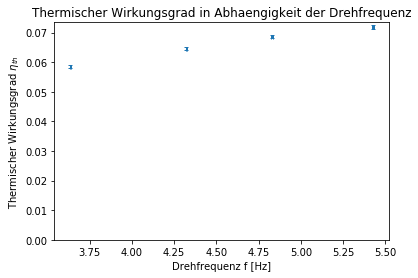

In [30]:
plt.errorbar(f, eta_th, xerr = f_error, yerr = eta_th_error, marker = '.', linestyle = 'none', markersize = 0.5, linewidth = 1, capsize = 2)
plt.xlabel("Drehfrequenz f [Hz]")
plt.ylabel("Thermischer Wirkungsgrad $\eta_{th}$")
plt.ylim(bottom = 0)
plt.title("Thermischer Wirkungsgrad in Abhaengigkeit der Drehfrequenz")
plt.savefig('Wirkungsgrad_th.pdf')

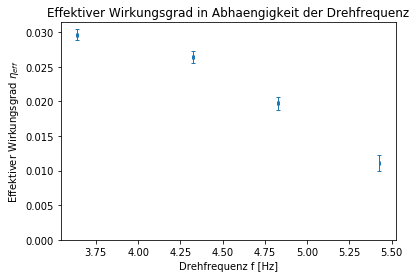

In [31]:
plt.errorbar(f, eta_eff, xerr = f_error, yerr = eta_eff_error, marker = '.', linestyle = 'none', markersize = 0.5, linewidth = 1, capsize = 2)
plt.xlabel("Drehfrequenz f [Hz]")
plt.ylabel("Effektiver Wirkungsgrad $\eta_{eff}$")
plt.ylim(bottom = 0)
plt.title("Effektiver Wirkungsgrad in Abhaengigkeit der Drehfrequenz")
plt.savefig('Wirkungsgrad_eff.pdf')